In [21]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dataset = pd.read_csv('dataset/train.csv')

In [23]:
dataset.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [24]:
dataset.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [25]:
# discovering columns with missing values

empty_cols = [i for i in dataset.columns if dataset[i].isnull().any()]
empty_cols

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [26]:
# there can be 3 ways to repopulate missing values
# without considering outliers or exceptional cases

# the method being mean, median and mode

# mean and median for float values and integers - category 1
# mode is ideal for categorical data - category 2

In [27]:
# category 1

dataset['Employment_Info_1'] = dataset['Employment_Info_1'].fillna(dataset['Employment_Info_1'].mean())
dataset['Employment_Info_4'] = dataset['Employment_Info_4'].fillna(dataset['Employment_Info_4'].mean())
dataset['Employment_Info_6'] = dataset['Employment_Info_6'].fillna(dataset['Employment_Info_6'].mean())

dataset['Family_Hist_2'] = dataset['Family_Hist_2'].fillna(dataset['Family_Hist_2'].mean())
dataset['Family_Hist_3'] = dataset['Family_Hist_3'].fillna(dataset['Family_Hist_3'].mean())
dataset['Family_Hist_4'] = dataset['Family_Hist_4'].fillna(dataset['Family_Hist_4'].mean())
dataset['Family_Hist_5'] = dataset['Family_Hist_5'].fillna(dataset['Family_Hist_5'].mean())

In [28]:
# category 2

dataset['Medical_History_1'] = dataset['Medical_History_1'].fillna(dataset['Medical_History_1'].mode())
dataset['Medical_History_10'] = dataset['Medical_History_10'].fillna(dataset['Medical_History_10'].mode())
dataset['Medical_History_15'] = dataset['Medical_History_15'].fillna(dataset['Medical_History_15'].mode())
dataset['Medical_History_24'] = dataset['Medical_History_24'].fillna(dataset['Medical_History_24'].mode())
dataset['Medical_History_32'] = dataset['Medical_History_32'].fillna(dataset['Medical_History_32'].mode())

In [29]:
# studying multicollinearity can help us discard similar variables

# the technique that we shall use to solve multi-collinearity is Variance Inflation Factor (VIF)

# we shall derive a table while calculating the VIF for each feature
# features with similar VIF are highly correlated

In [30]:
print(dataset.corr())


                          Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                  1.000000       -0.002870       -0.001869       -0.002914   
Product_Info_1     -0.002870        1.000000        0.027573        0.059829   
Product_Info_3     -0.001869        0.027573        1.000000        0.048775   
Product_Info_4     -0.002914        0.059829        0.048775        1.000000   
Product_Info_5     -0.004195        0.069720        0.025419        0.040433   
...                      ...             ...             ...             ...   
Medical_Keyword_45 -0.000286       -0.006719       -0.053305       -0.019914   
Medical_Keyword_46  0.002684       -0.010638       -0.001538       -0.047318   
Medical_Keyword_47  0.001199        0.004402       -0.017001       -0.021974   
Medical_Keyword_48 -0.001122       -0.008469        0.045862       -0.030896   
Response            0.000462        0.014692       -0.067432        0.202434   

                    Product_Info_5  Pro

In [31]:
dataset['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

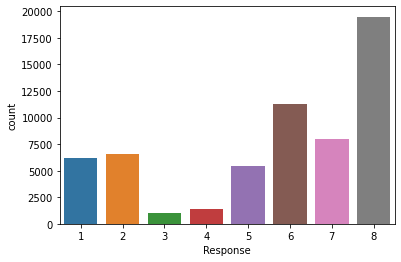

In [34]:
sns.countplot(x=dataset['Response']);

In [92]:
columns =  [col for col in dataset.columns]
columns.pop(2)
columns.pop(0)
columns

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_10',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',

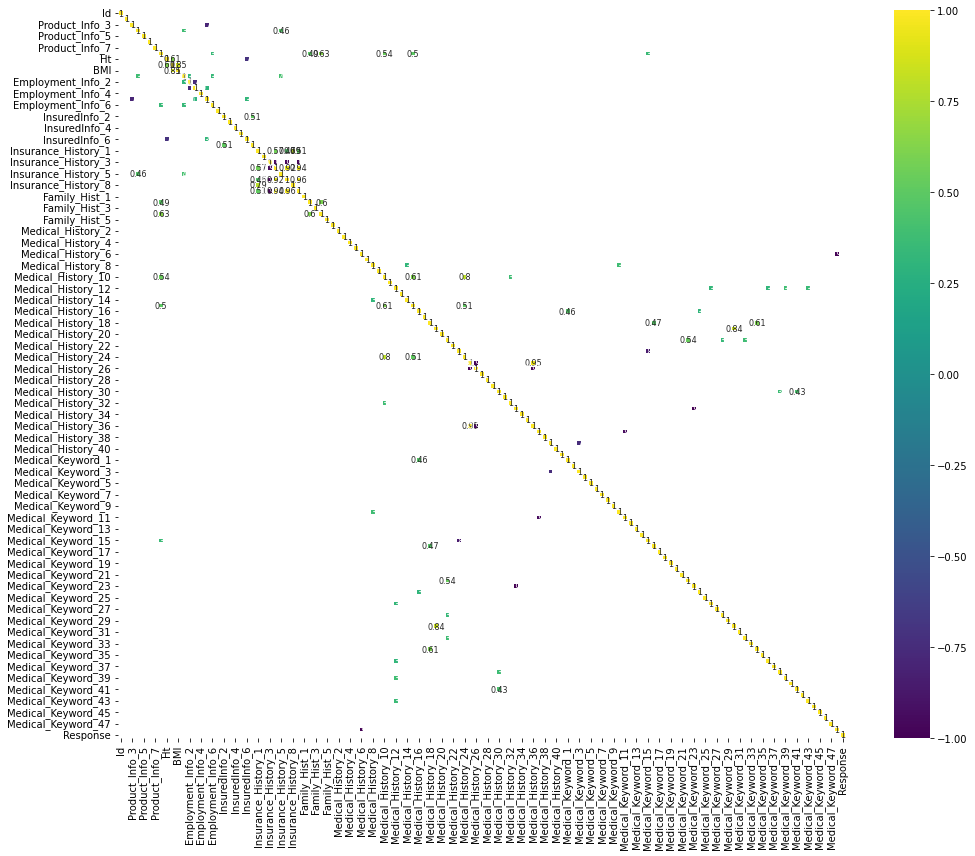

In [93]:
#create a correlation matrix
corr = dataset.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [94]:
corr

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,1.000000,-0.002870,-0.001792,-0.002914,-0.004195,0.005038,0.002125,0.001764,0.003674,0.005648,...,-0.001746,0.005721,-0.004575,-0.007633,0.001917,-0.000286,0.002684,0.001199,-0.001122,0.000462
Product_Info_1,-0.002870,1.000000,0.027125,0.059829,0.069720,-0.078684,0.012163,-0.077429,0.052720,-0.004035,...,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,0.014692
Product_Info_3,-0.001792,0.027125,1.000000,0.052948,0.025741,-0.018755,0.016378,0.005490,0.294870,0.215518,...,-0.039362,0.000567,-0.036484,0.035213,0.002829,-0.053390,-0.001777,-0.016365,0.046182,-0.066316
Product_Info_4,-0.002914,0.059829,0.052948,1.000000,0.040433,-0.089075,0.051556,-0.261356,0.141780,-0.028041,...,-0.021352,-0.015152,-0.041935,-0.039131,-0.002671,-0.019914,-0.047318,-0.021974,-0.030896,0.202434
Product_Info_5,-0.004195,0.069720,0.025741,0.040433,1.000000,-0.045840,0.019430,0.006543,0.054495,0.022393,...,-0.008326,0.011878,-0.005644,0.001135,-0.004944,-0.002885,-0.005534,-0.000320,0.004904,-0.001486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,-0.000286,-0.006719,-0.053390,-0.019914,-0.002885,-0.002870,0.002264,0.043924,-0.062366,-0.027579,...,0.014192,-0.000252,0.033351,-0.006628,-0.000201,1.000000,0.003317,0.002923,0.017043,0.004852
Medical_Keyword_46,0.002684,-0.010638,-0.001777,-0.047318,-0.005534,0.002609,0.008821,0.114839,0.012234,0.073164,...,0.012907,0.012757,0.024699,0.022474,0.013181,0.003317,1.000000,0.026243,0.061895,-0.054693
Medical_Keyword_47,0.001199,0.004402,-0.016365,-0.021974,-0.000320,-0.009493,0.014236,0.062636,-0.012682,0.016217,...,0.021684,0.017060,0.046946,0.021482,0.021066,0.002923,0.026243,1.000000,0.044397,-0.060104
Medical_Keyword_48,-0.001122,-0.008469,0.046182,-0.030896,0.004904,-0.003590,0.031747,0.138007,0.102564,0.235822,...,0.040558,0.017451,0.067131,0.062229,0.016858,0.017043,0.061895,0.044397,1.000000,-0.159557


In [95]:
#columns are barely multicollinear so we can't drop the columns

Column:  Product_Info_1


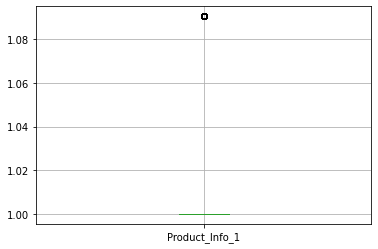

count    59381.000000
mean         1.002385
std          0.014498
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.090508
Name: Product_Info_1, dtype: float64
Skewness:  5.913710040075939


Column:  Product_Info_3


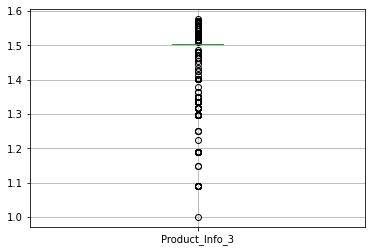

count    59381.000000
mean         1.485357
std          0.053467
min          1.000000
25%          1.502698
50%          1.502698
75%          1.502698
max          1.575698
Name: Product_Info_3, dtype: float64
Skewness:  -2.5781629705271847


Column:  Product_Info_4


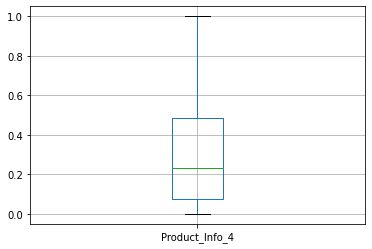

count    59381.000000
mean         0.328952
std          0.282562
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64
Skewness:  1.2212725798546873


Column:  Product_Info_5


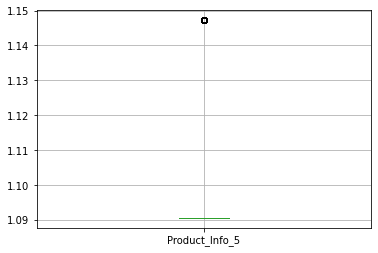

count    59381.000000
mean         1.090902
std          0.004712
min          1.090508
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Product_Info_5, dtype: float64
Skewness:  11.865655390570756


Column:  Product_Info_6


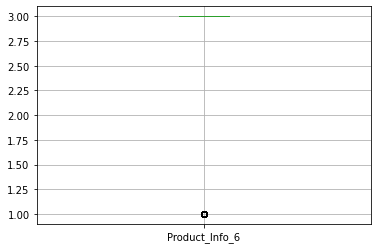

count    59381.000000
mean         2.673599
std          0.739103
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Product_Info_6, dtype: float64
Skewness:  -1.8228096094843784


Column:  Product_Info_7


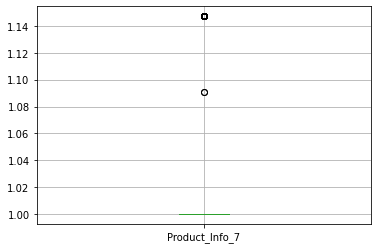

count    59381.000000
mean         1.003208
std          0.021490
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Product_Info_7, dtype: float64
Skewness:  6.5499566740639565


Column:  Ins_Age


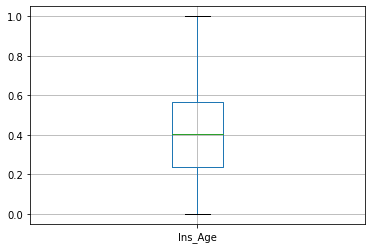

count    59381.000000
mean         0.405567
std          0.197190
min          0.000000
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64
Skewness:  0.021995674311029476


Column:  Ht


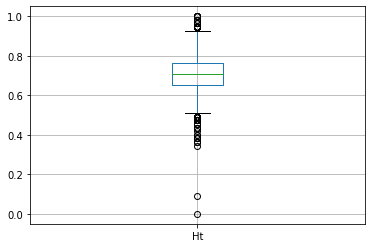

count    59381.000000
mean         0.707283
std          0.074239
min          0.000000
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64
Skewness:  -0.08671154551855319


Column:  Wt


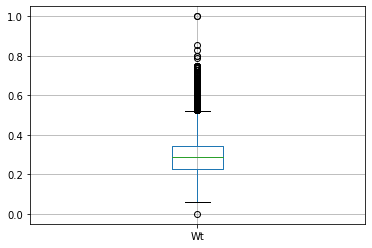

count    59381.000000
mean         0.292587
std          0.089037
min          0.000000
25%          0.225941
50%          0.288703
75%          0.345188
max          1.000000
Name: Wt, dtype: float64
Skewness:  0.6940309063501783


Column:  BMI


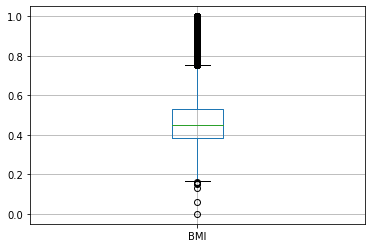

count    59381.000000
mean         0.469462
std          0.122213
min          0.000000
25%          0.385517
50%          0.451349
75%          0.532858
max          1.000000
Name: BMI, dtype: float64
Skewness:  0.944260717685289


Column:  Employment_Info_1


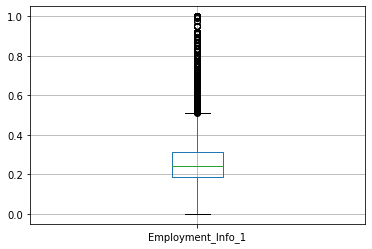

count    59381.000000
mean         0.250163
std          0.122478
min          0.000000
25%          0.187083
50%          0.244949
75%          0.316228
max          1.000000
Name: Employment_Info_1, dtype: float64
Skewness:  0.886460817721878


Column:  Employment_Info_2


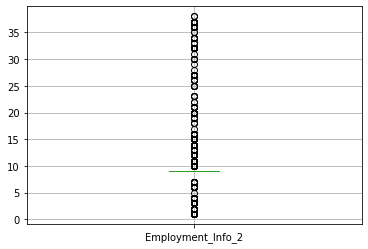

count    59381.000000
mean         8.641821
std          4.227082
min          1.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         38.000000
Name: Employment_Info_2, dtype: float64
Skewness:  0.5634913999800427


Column:  Employment_Info_3


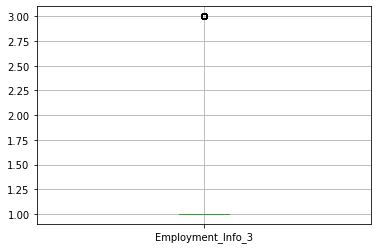

count    59381.000000
mean         1.300904
std          0.715034
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Employment_Info_3, dtype: float64
Skewness:  1.9554847970457538


Column:  Employment_Info_4


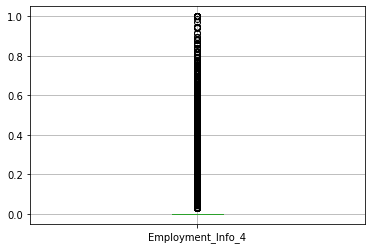

count    59381.000000
mean         0.083321
std          0.156051
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64
Skewness:  1.7184167950656173


Column:  Employment_Info_5


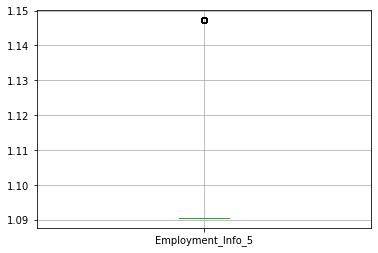

count    59381.000000
mean         1.098613
std          0.019845
min          1.090508
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Employment_Info_5, dtype: float64
Skewness:  2.0401144343150763


Column:  Employment_Info_6


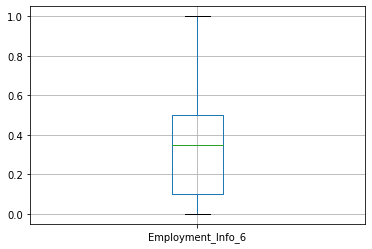

count    59381.000000
mean         0.361469
std          0.315993
min          0.000000
25%          0.100000
50%          0.350000
75%          0.500000
max          1.000000
Name: Employment_Info_6, dtype: float64
Skewness:  0.8703716496406719


Column:  InsuredInfo_1


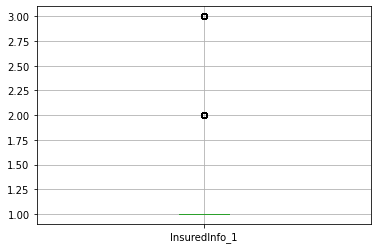

count    59381.000000
mean         1.209326
std          0.417939
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_1, dtype: float64
Skewness:  1.6157591587674176


Column:  InsuredInfo_2


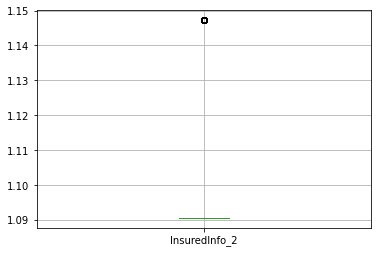

count    59381.000000
mean         1.090929
std          0.004868
min          1.090508
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: InsuredInfo_2, dtype: float64
Skewness:  11.474533875946918


Column:  InsuredInfo_3


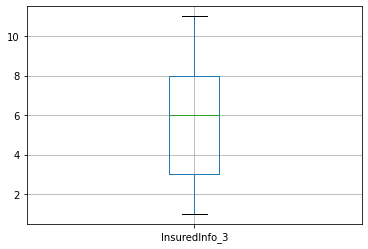

count    59381.000000
mean         5.835840
std          2.674536
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10829206979812836


Column:  InsuredInfo_4


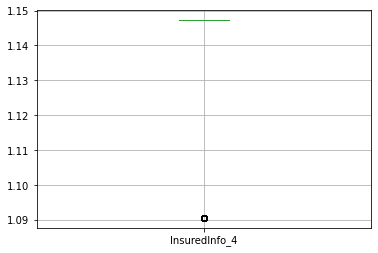

count    59381.000000
mean         1.140607
std          0.018178
min          1.090508
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.3933060224897122


Column:  InsuredInfo_5


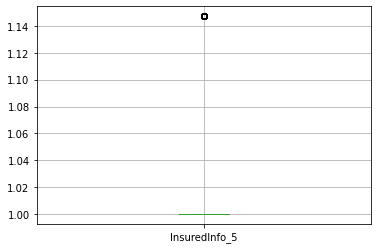

count    59381.000000
mean         1.002001
std          0.017044
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: InsuredInfo_5, dtype: float64
Skewness:  8.402365629626912


Column:  InsuredInfo_6


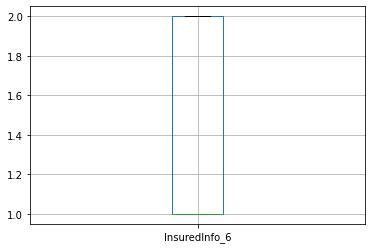

count    59381.000000
mean         1.409188
std          0.491688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: InsuredInfo_6, dtype: float64
Skewness:  0.36940051332325


Column:  InsuredInfo_7


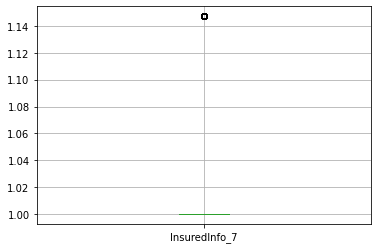

count    59381.000000
mean         1.002836
std          0.020234
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: InsuredInfo_7, dtype: float64
Skewness:  6.99489701982219


Column:  Insurance_History_1


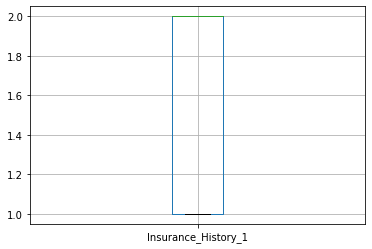

count    59381.000000
mean         1.727606
std          0.445195
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Insurance_History_1, dtype: float64
Skewness:  -1.0225367086751107


Column:  Insurance_History_2


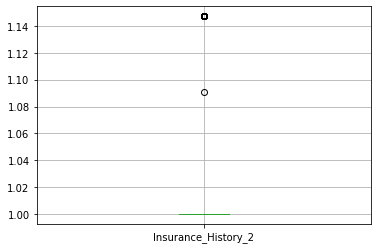

count    59381.000000
mean         1.004107
std          0.024240
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Insurance_History_2, dtype: float64
Skewness:  5.7335822854006695


Column:  Insurance_History_3


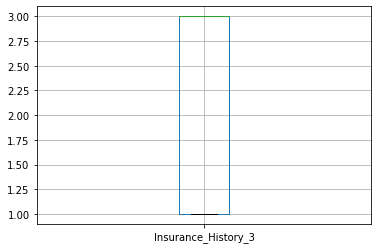

count    59381.000000
mean         2.146983
std          0.989139
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2972014102879703


Column:  Insurance_History_4


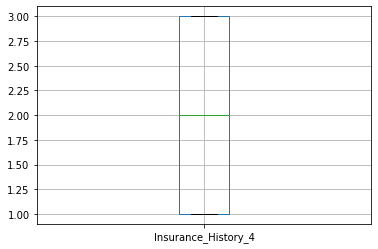

count    59381.000000
mean         1.958707
std          0.945739
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_4, dtype: float64
Skewness:  0.0822549371838283


Column:  Insurance_History_5


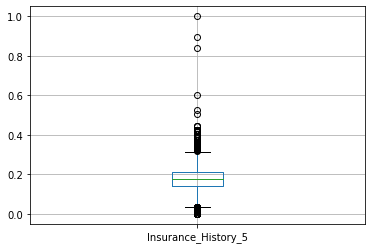

count    33985.000000
mean         0.179507
std          0.054606
min          0.000000
25%          0.141421
50%          0.176630
75%          0.211474
max          1.000000
Name: Insurance_History_5, dtype: float64
Skewness:  0.5346677825438437


Column:  Insurance_History_7


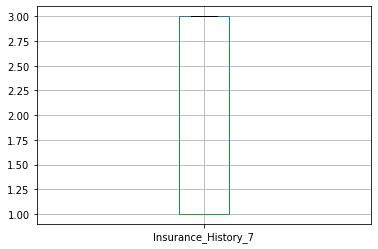

count    59381.000000
mean         1.901989
std          0.971223
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Insurance_History_7, dtype: float64
Skewness:  0.19679415616574578


Column:  Insurance_History_8


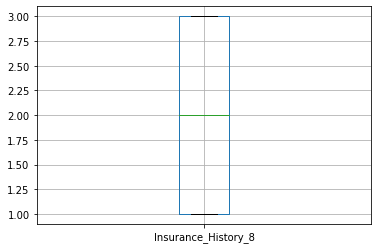

count    59381.000000
mean         2.048484
std          0.755149
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_8, dtype: float64
Skewness:  -0.08028808706123916


Column:  Insurance_History_9


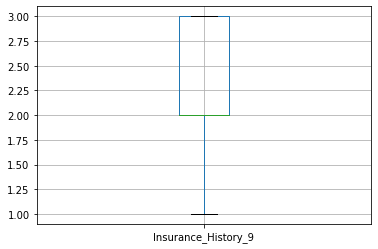

count    59381.000000
mean         2.419360
std          0.509577
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_9, dtype: float64
Skewness:  0.14308556984823534


Column:  Family_Hist_1


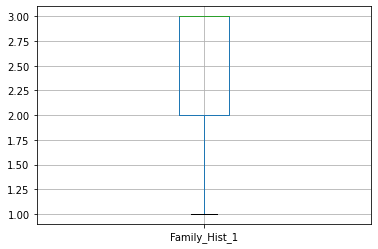

count    59381.000000
mean         2.686230
std          0.483159
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0418239409439525


Column:  Family_Hist_2


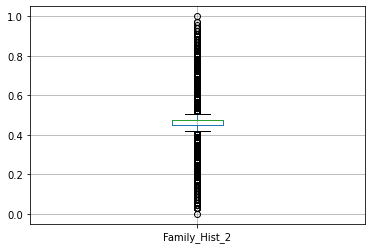

count    59381.000000
mean         0.474550
std          0.111464
min          0.000000
25%          0.449275
50%          0.474550
75%          0.474550
max          1.000000
Name: Family_Hist_2, dtype: float64
Skewness:  0.29485711424018335


Column:  Family_Hist_3


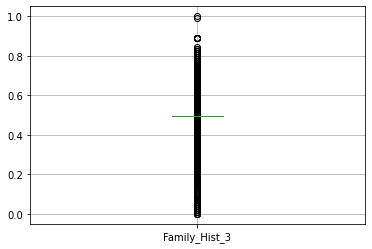

count    59381.000000
mean         0.497737
std          0.091214
min          0.000000
25%          0.497737
50%          0.497737
75%          0.497737
max          1.000000
Name: Family_Hist_3, dtype: float64
Skewness:  -0.8734219423730446


Column:  Family_Hist_4


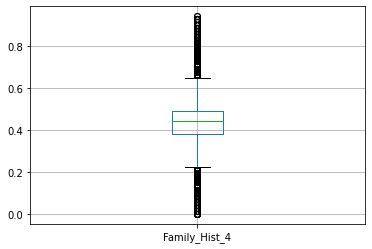

count    59381.000000
mean         0.444890
std          0.134119
min          0.000000
25%          0.380282
50%          0.444890
75%          0.492958
max          0.943662
Name: Family_Hist_4, dtype: float64
Skewness:  0.2516524016373548


Column:  Family_Hist_5


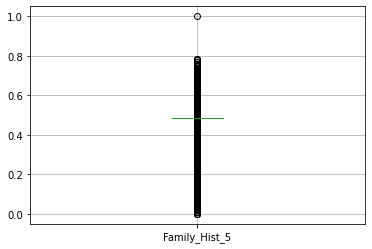

count    59381.000000
mean         0.484635
std          0.070277
min          0.000000
25%          0.484635
50%          0.484635
75%          0.484635
max          1.000000
Name: Family_Hist_5, dtype: float64
Skewness:  -1.3391441846489476


Column:  Medical_History_1


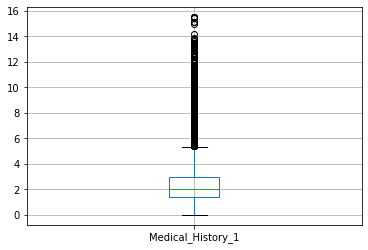

count    50492.000000
mean         2.302663
std          1.630941
min          0.000000
25%          1.414214
50%          2.000000
75%          3.000000
max         15.491933
Name: Medical_History_1, dtype: float64
Skewness:  1.5754578600683726


Column:  Medical_History_2


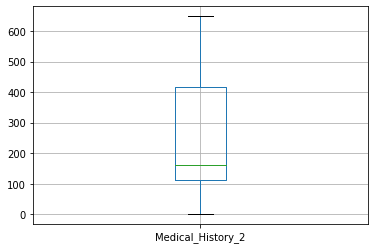

count    59381.000000
mean       253.987100
std        178.621154
min          1.000000
25%        112.000000
50%        162.000000
75%        418.000000
max        648.000000
Name: Medical_History_2, dtype: float64
Skewness:  0.5939859106926527


Column:  Medical_History_3


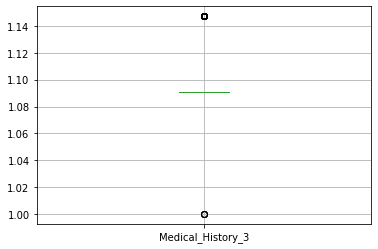

count    59381.000000
mean         1.096298
std          0.017195
min          1.000000
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Medical_History_3, dtype: float64
Skewness:  2.6068365953545345


Column:  Medical_History_4


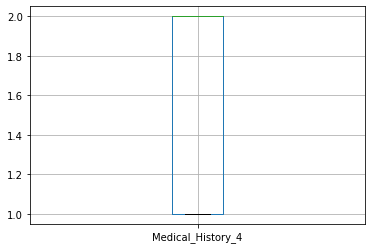

count    59381.000000
mean         1.654873
std          0.475414
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Medical_History_4, dtype: float64
Skewness:  -0.6515503098011224


Column:  Medical_History_5


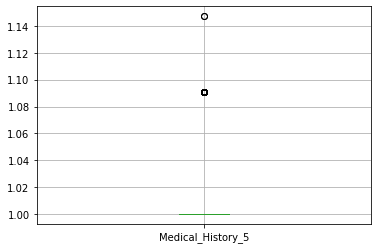

count    59381.000000
mean         1.000665
std          0.007747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Medical_History_5, dtype: float64
Skewness:  11.599738439605545


Column:  Medical_History_6


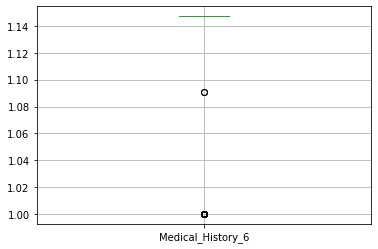

count    59381.000000
mean         1.139100
std          0.033571
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_6, dtype: float64
Skewness:  -3.9020231299421537


Column:  Medical_History_7


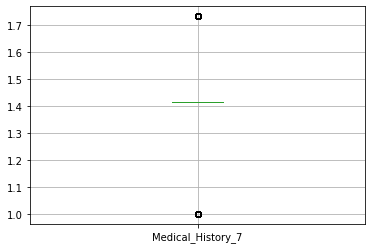

count    59381.000000
mean         1.417268
std          0.060226
min          1.000000
25%          1.414214
50%          1.414214
75%          1.414214
max          1.732051
Name: Medical_History_7, dtype: float64
Skewness:  0.08436167706741068


Column:  Medical_History_8


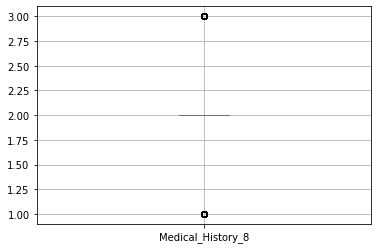

count    59381.000000
mean         2.044088
std          0.291353
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_8, dtype: float64
Skewness:  1.3252768886036914


Column:  Medical_History_9


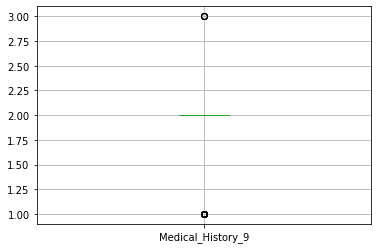

count    59381.000000
mean         1.769943
std          0.421032
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_9, dtype: float64
Skewness:  -1.2801145207240956


Column:  Medical_History_10


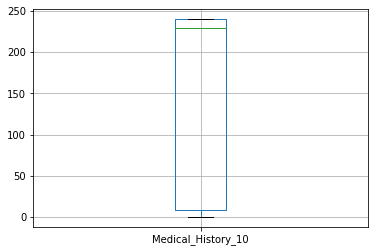

count    558.000000
mean     141.295699
std      107.744130
min        0.000000
25%        8.000000
50%      229.000000
75%      240.000000
max      240.000000
Name: Medical_History_10, dtype: float64
Skewness:  -0.31310178884172835


Column:  Medical_History_11


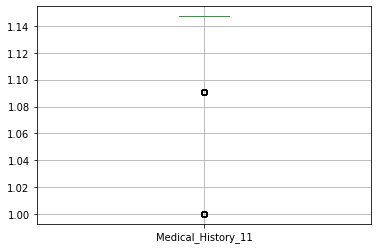

count    59381.000000
mean         1.146803
std          0.006499
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_11, dtype: float64
Skewness:  -19.160360722583867


Column:  Medical_History_12


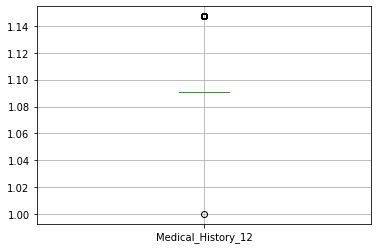

count    59381.000000
mean         1.093716
std          0.013109
min          1.000000
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Medical_History_12, dtype: float64
Skewness:  3.826324749394863


Column:  Medical_History_13


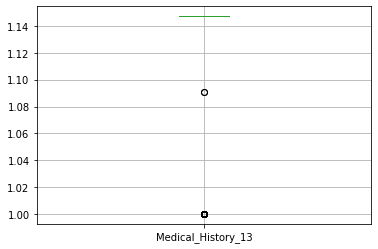

count    59381.000000
mean         1.130138
std          0.047123
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_13, dtype: float64
Skewness:  -2.399538137207772


Column:  Medical_History_14


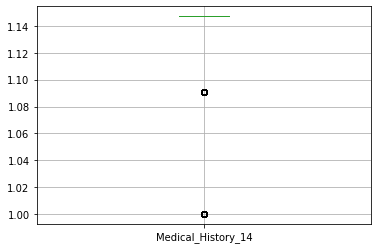

count    59381.000000
mean         1.145273
std          0.012771
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_14, dtype: float64
Skewness:  -8.14352617019322


Column:  Medical_History_15


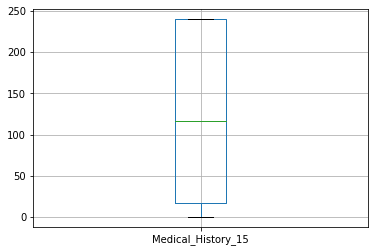

count    14785.000000
mean       123.760974
std         98.516206
min          0.000000
25%         17.000000
50%        117.000000
75%        240.000000
max        240.000000
Name: Medical_History_15, dtype: float64
Skewness:  0.01707845706001109


Column:  Medical_History_16


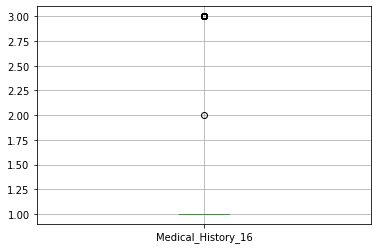

count    59381.000000
mean         1.327529
std          0.740118
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_16, dtype: float64
Skewness:  1.81723185034176


Column:  Medical_History_17


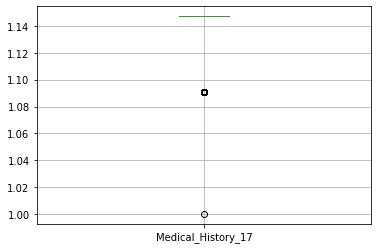

count    59381.000000
mean         1.145955
std          0.008330
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_17, dtype: float64
Skewness:  -6.563139409636979


Column:  Medical_History_18


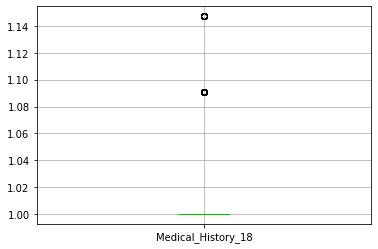

count    59381.000000
mean         1.004840
std          0.020397
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Medical_History_18, dtype: float64
Skewness:  3.986556290108587


Column:  Medical_History_19


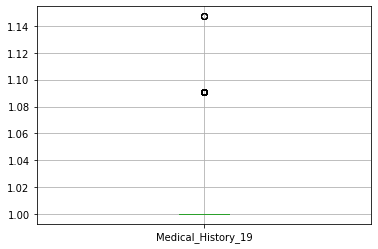

count    59381.000000
mean         1.003116
std          0.016522
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Medical_History_19, dtype: float64
Skewness:  5.1233623947947935


Column:  Medical_History_20


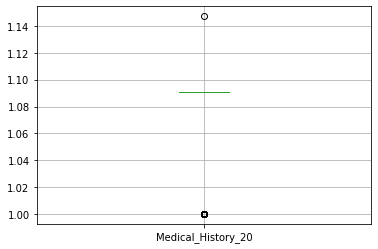

count    59381.000000
mean         1.089157
std          0.010981
min          1.000000
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Medical_History_20, dtype: float64
Skewness:  -7.9898997232146405


Column:  Medical_History_21


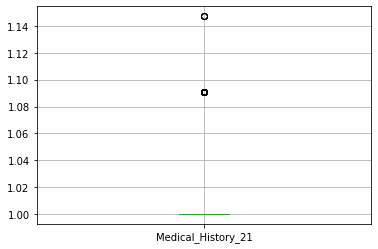

count    59381.000000
mean         1.009862
std          0.028212
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Medical_History_21, dtype: float64
Skewness:  2.512490424267969


Column:  Medical_History_22


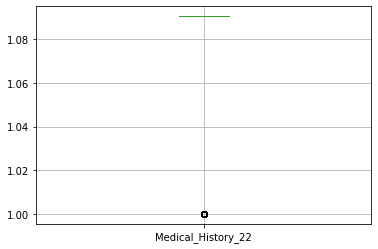

count    59381.000000
mean         1.088846
std          0.012149
min          1.000000
25%          1.090508
50%          1.090508
75%          1.090508
max          1.090508
Name: Medical_History_22, dtype: float64
Skewness:  -7.176300072286253


Column:  Medical_History_23


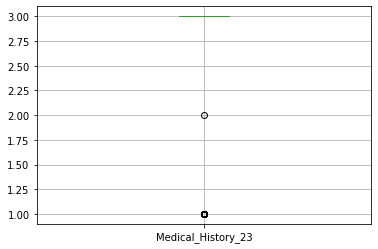

count    59381.000000
mean         2.528115
std          0.849170
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_23, dtype: float64
Skewness:  -1.2438655069271336


Column:  Medical_History_24


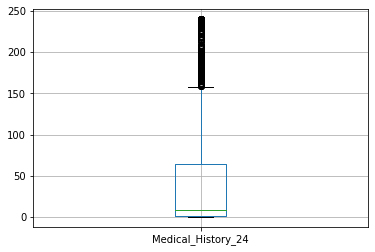

count    3802.000000
mean       50.622304
std        78.143103
min         0.000000
25%         1.000000
50%         8.000000
75%        64.000000
max       240.000000
Name: Medical_History_24, dtype: float64
Skewness:  1.557807941289194


Column:  Medical_History_25


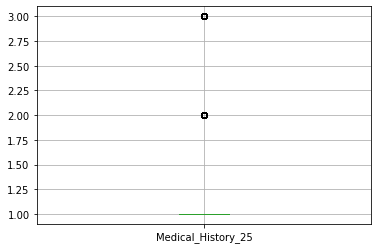

count    59381.000000
mean         1.194961
std          0.406082
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_25, dtype: float64
Skewness:  1.7166689684627388


Column:  Medical_History_26


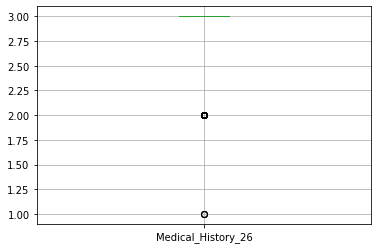

count    59381.000000
mean         2.808979
std          0.393237
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_26, dtype: float64
Skewness:  -1.5745245542775128


Column:  Medical_History_27


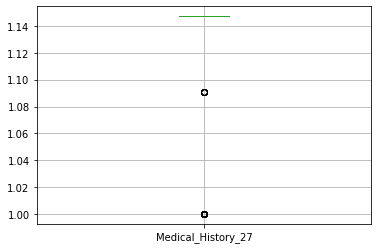

count    59381.000000
mean         1.145748
std          0.014539
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_27, dtype: float64
Skewness:  -9.914275646075405


Column:  Medical_History_28


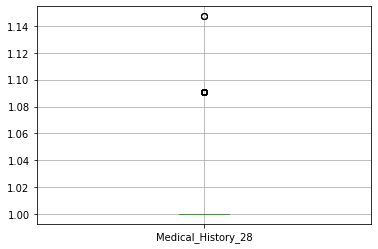

count    59381.000000
mean         1.006081
std          0.022668
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Medical_History_28, dtype: float64
Skewness:  3.461368215514586


Column:  Medical_History_29


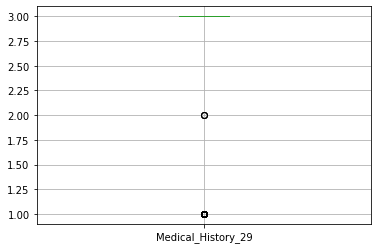

count    59381.000000
mean         2.542699
std          0.839904
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_29, dtype: float64
Skewness:  -1.2922844971581418


Column:  Medical_History_30


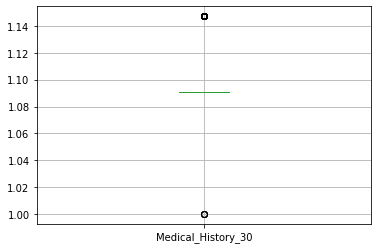

count    59381.000000
mean         1.092817
std          0.011247
min          1.000000
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Medical_History_30, dtype: float64
Skewness:  4.571990662390918


Column:  Medical_History_31


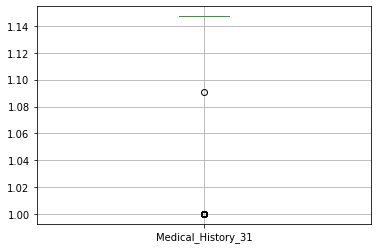

count    59381.000000
mean         1.146118
std          0.012584
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_31, dtype: float64
Skewness:  -11.52365556653684


Column:  Medical_History_32


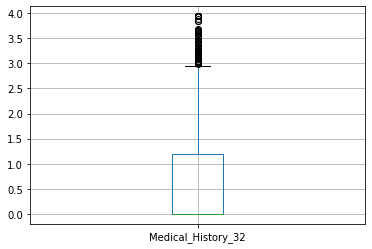

count    1108.000000
mean        0.631704
std         1.034076
min         0.000000
25%         0.000000
50%         0.000000
75%         1.189207
max         3.935979
Name: Medical_History_32, dtype: float64
Skewness:  1.5347597290740076


Column:  Medical_History_33


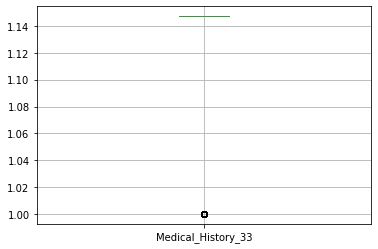

count    59381.000000
mean         1.132822
std          0.043704
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_33, dtype: float64
Skewness:  -2.7101619228096254


Column:  Medical_History_34


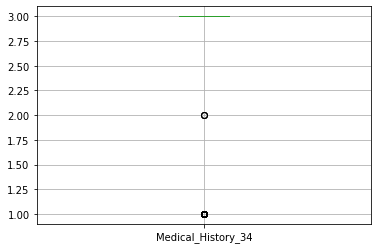

count    59381.000000
mean         2.689076
std          0.724661
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_34, dtype: float64
Skewness:  -1.9017609545070016


Column:  Medical_History_35


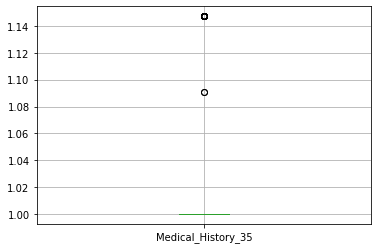

count    59381.000000
mean         1.000152
std          0.004706
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.147203
Name: Medical_History_35, dtype: float64
Skewness:  31.06558132505732


Column:  Medical_History_36


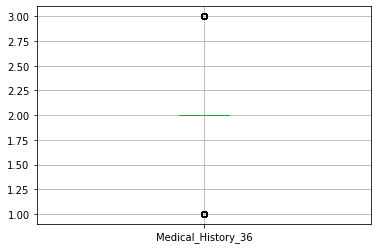

count    59381.000000
mean         2.179468
std          0.412633
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_36, dtype: float64
Skewness:  1.1674384099363653


Column:  Medical_History_37


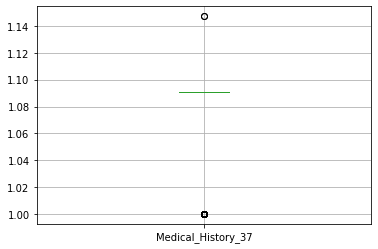

count    59381.000000
mean         1.084931
std          0.021770
min          1.000000
25%          1.090508
50%          1.090508
75%          1.090508
max          1.147203
Name: Medical_History_37, dtype: float64
Skewness:  -3.643617880094614


Column:  Medical_History_38


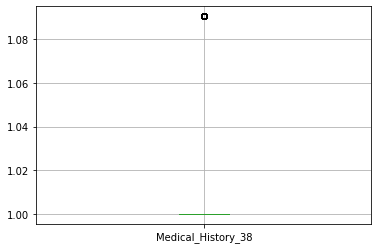

count    59381.000000
mean         1.000439
std          0.006288
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.090508
Name: Medical_History_38, dtype: float64
Skewness:  14.25479453593598


Column:  Medical_History_39


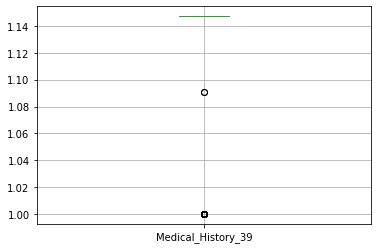

count    59381.000000
mean         1.134744
std          0.040971
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_39, dtype: float64
Skewness:  -2.9847057494404075


Column:  Medical_History_40


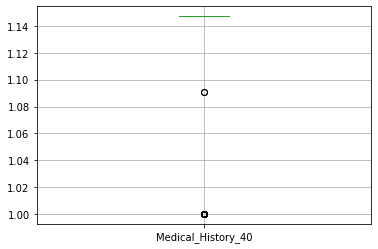

count    59381.000000
mean         1.144819
std          0.018577
min          1.000000
25%          1.147203
50%          1.147203
75%          1.147203
max          1.147203
Name: Medical_History_40, dtype: float64
Skewness:  -7.666013450539503


Column:  Medical_History_41


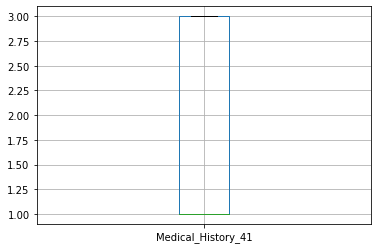

count    59381.000000
mean         1.641064
std          0.933361
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Medical_History_41, dtype: float64
Skewness:  0.7691451197703993


Column:  Medical_Keyword_1


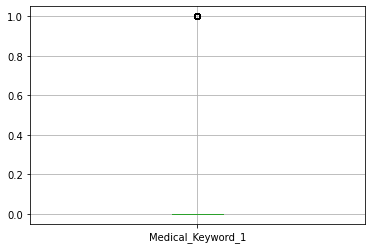

count    59381.000000
mean         0.042000
std          0.200591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_1, dtype: float64
Skewness:  4.5666659378491845


Column:  Medical_Keyword_2


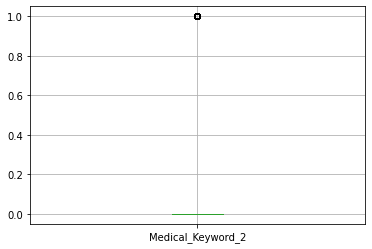

count    59381.000000
mean         0.008942
std          0.094141
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_2, dtype: float64
Skewness:  10.432791909731312


Column:  Medical_Keyword_3


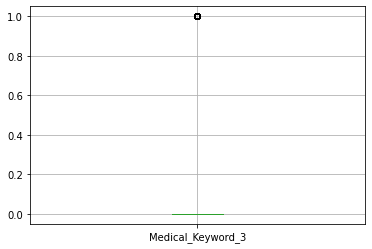

count    59381.000000
mean         0.049275
std          0.216443
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_3, dtype: float64
Skewness:  4.164968625110455


Column:  Medical_Keyword_4


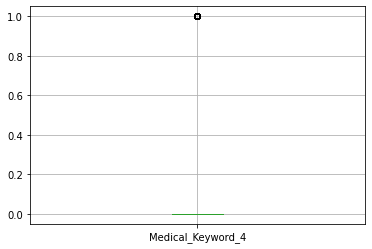

count    59381.000000
mean         0.014550
std          0.119744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_4, dtype: float64
Skewness:  8.108396620359576


Column:  Medical_Keyword_5


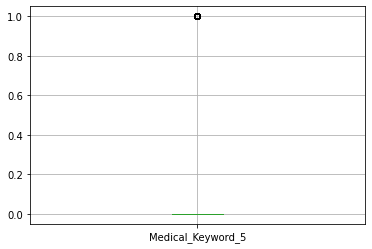

count    59381.000000
mean         0.008622
std          0.092456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_5, dtype: float64
Skewness:  10.629812858612603


Column:  Medical_Keyword_6


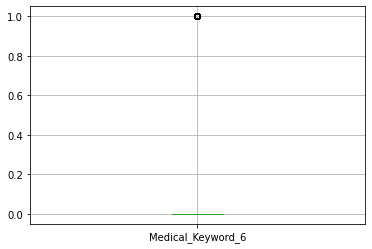

count    59381.000000
mean         0.012597
std          0.111526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_6, dtype: float64
Skewness:  8.74087987028413


Column:  Medical_Keyword_7


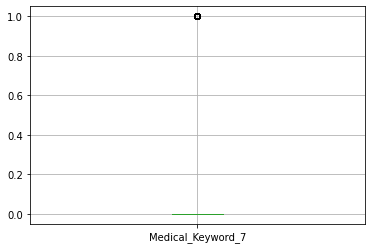

count    59381.000000
mean         0.013910
std          0.117119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_7, dtype: float64
Skewness:  8.301049221080795


Column:  Medical_Keyword_8


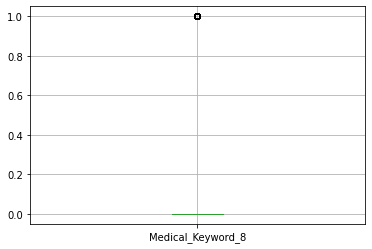

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_8, dtype: float64
Skewness:  9.648884955654573


Column:  Medical_Keyword_9


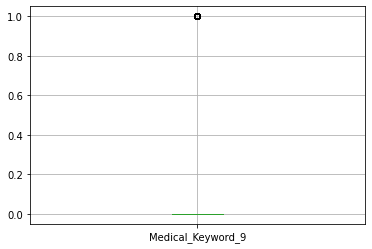

count    59381.000000
mean         0.006652
std          0.081289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_9, dtype: float64
Skewness:  12.138607256170813


Column:  Medical_Keyword_10


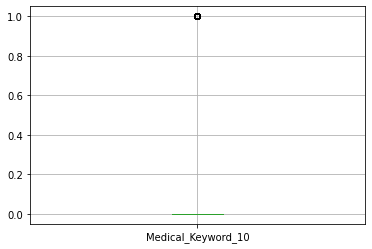

count    59381.000000
mean         0.036459
std          0.187432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_10, dtype: float64
Skewness:  4.9463914904411315


Column:  Medical_Keyword_11


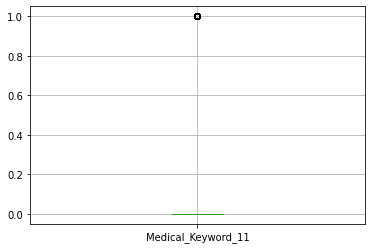

count    59381.000000
mean         0.058015
std          0.233774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_11, dtype: float64
Skewness:  3.7814250849496482


Column:  Medical_Keyword_12


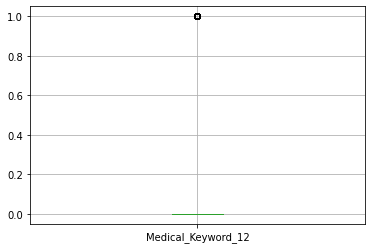

count    59381.000000
mean         0.010003
std          0.099515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_12, dtype: float64
Skewness:  9.847995603913516


Column:  Medical_Keyword_13


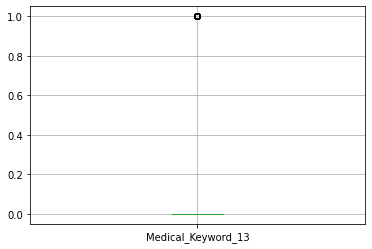

count    59381.000000
mean         0.005962
std          0.076981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_13, dtype: float64
Skewness:  12.835780412504183


Column:  Medical_Keyword_14


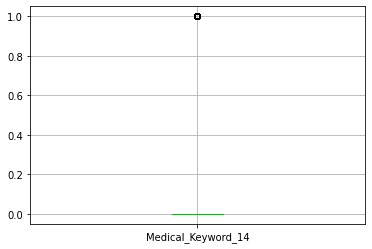

count    59381.000000
mean         0.007848
std          0.088239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_14, dtype: float64
Skewness:  11.155323178356184


Column:  Medical_Keyword_15


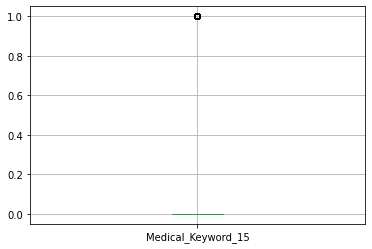

count    59381.000000
mean         0.190465
std          0.392671
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_15, dtype: float64
Skewness:  1.5766141021995717


Column:  Medical_Keyword_16


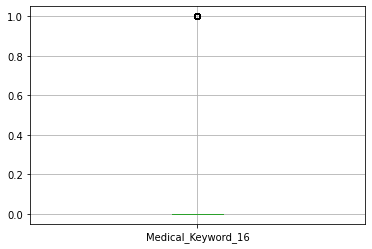

count    59381.000000
mean         0.012715
std          0.112040
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_16, dtype: float64
Skewness:  8.698679907869543


Column:  Medical_Keyword_17


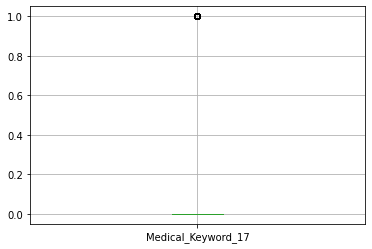

count    59381.000000
mean         0.009161
std          0.095275
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_17, dtype: float64
Skewness:  10.303924482105579


Column:  Medical_Keyword_18


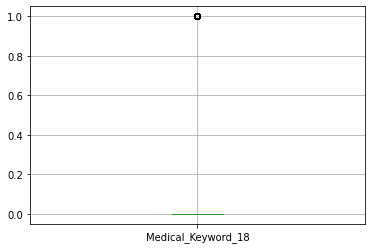

count    59381.000000
mean         0.007494
std          0.086244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_18, dtype: float64
Skewness:  11.421671974293576


Column:  Medical_Keyword_19


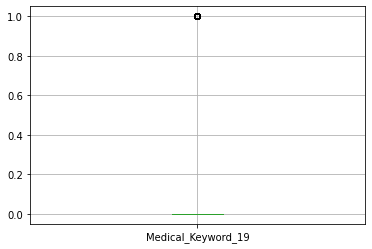

count    59381.000000
mean         0.009296
std          0.095967
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_19, dtype: float64
Skewness:  10.226873540823748


Column:  Medical_Keyword_20


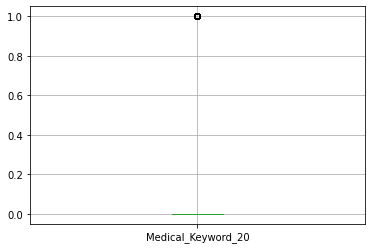

count    59381.000000
mean         0.008134
std          0.089821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_20, dtype: float64
Skewness:  10.95245588470808


Column:  Medical_Keyword_21


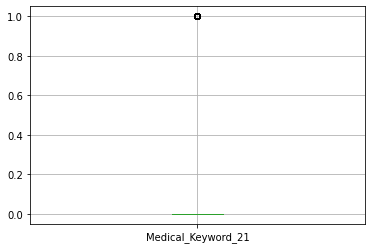

count    59381.000000
mean         0.014601
std          0.119949
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_21, dtype: float64
Skewness:  8.093721182897697


Column:  Medical_Keyword_22


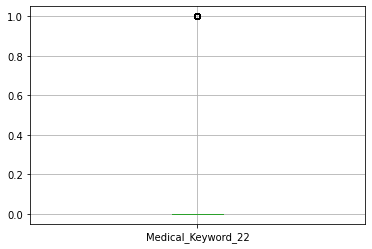

count    59381.000000
mean         0.037167
std          0.189172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_22, dtype: float64
Skewness:  4.893420647372886


Column:  Medical_Keyword_23


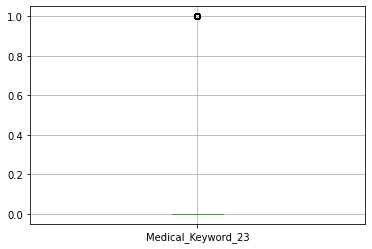

count    59381.000000
mean         0.097775
std          0.297013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_23, dtype: float64
Skewness:  2.7085541029554148


Column:  Medical_Keyword_24


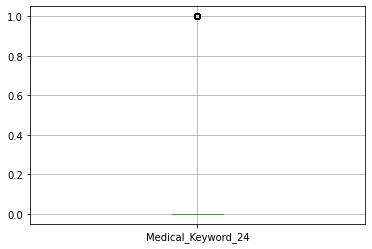

count    59381.000000
mean         0.018895
std          0.136155
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_24, dtype: float64
Skewness:  7.067250142075075


Column:  Medical_Keyword_25


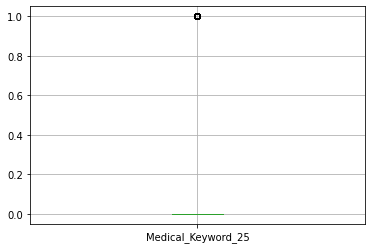

count    59381.000000
mean         0.089456
std          0.285404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_25, dtype: float64
Skewness:  2.877032346250007


Column:  Medical_Keyword_26


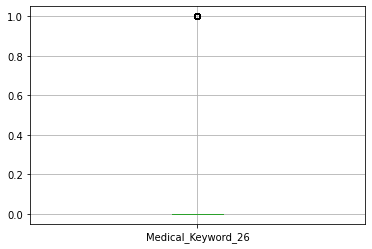

count    59381.000000
mean         0.013439
std          0.115145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_26, dtype: float64
Skewness:  8.45159813798485


Column:  Medical_Keyword_27


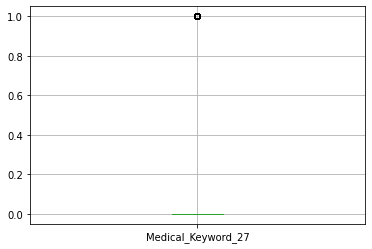

count    59381.000000
mean         0.011856
std          0.108237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_27, dtype: float64
Skewness:  9.020206197261881


Column:  Medical_Keyword_28


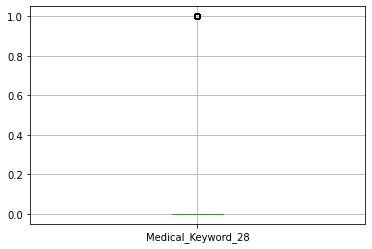

count    59381.000000
mean         0.014937
std          0.121304
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_28, dtype: float64
Skewness:  7.997767218968926


Column:  Medical_Keyword_29


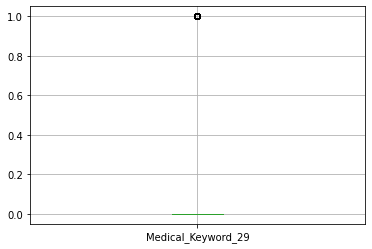

count    59381.000000
mean         0.011755
std          0.107780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_29, dtype: float64
Skewness:  9.06030394281217


Column:  Medical_Keyword_30


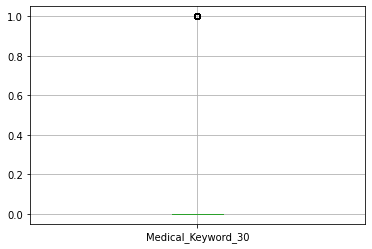

count    59381.000000
mean         0.025042
std          0.156253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_30, dtype: float64
Skewness:  6.079553863105806


Column:  Medical_Keyword_31


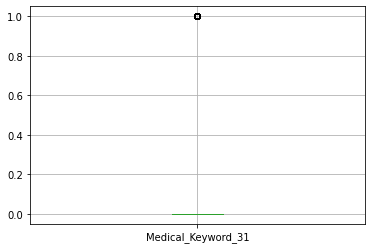

count    59381.000000
mean         0.010896
std          0.103813
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_31, dtype: float64
Skewness:  9.423082385969868


Column:  Medical_Keyword_32


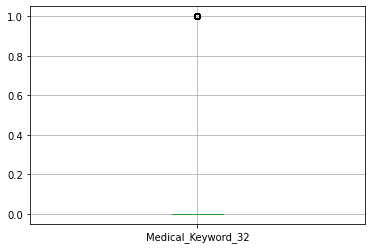

count    59381.000000
mean         0.021168
std          0.143947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_32, dtype: float64
Skewness:  6.653128363192594


Column:  Medical_Keyword_33


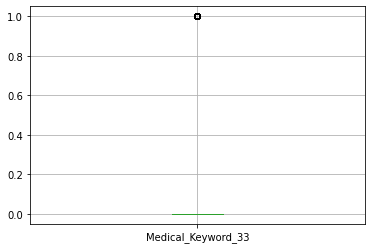

count    59381.000000
mean         0.022836
std          0.149380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_33, dtype: float64
Skewness:  6.388797169381426


Column:  Medical_Keyword_34


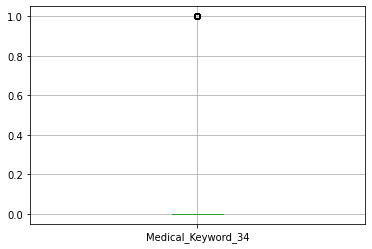

count    59381.000000
mean         0.020646
std          0.142198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_34, dtype: float64
Skewness:  6.742264109637791


Column:  Medical_Keyword_35


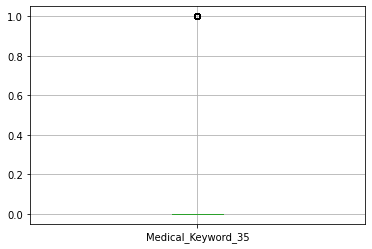

count    59381.000000
mean         0.006938
std          0.083007
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_35, dtype: float64
Skewness:  11.88035176926597


Column:  Medical_Keyword_36


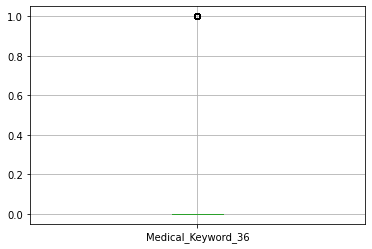

count    59381.000000
mean         0.010407
std          0.101485
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_36, dtype: float64
Skewness:  9.64888495565458


Column:  Medical_Keyword_37


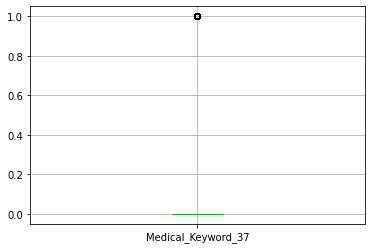

count    59381.000000
mean         0.066587
std          0.249307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_37, dtype: float64
Skewness:  3.477053978141677


Column:  Medical_Keyword_38


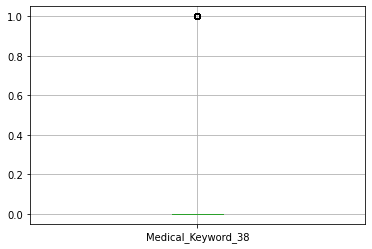

count    59381.000000
mean         0.006837
std          0.082405
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_38, dtype: float64
Skewness:  11.969659278126407


Column:  Medical_Keyword_39


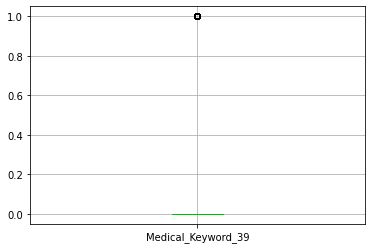

count    59381.000000
mean         0.013658
std          0.116066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_39, dtype: float64
Skewness:  8.38074443186075


Column:  Medical_Keyword_40


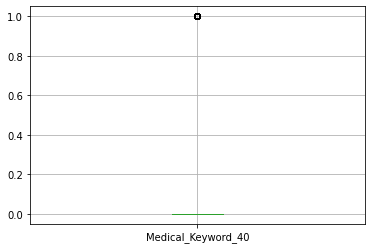

count    59381.000000
mean         0.056954
std          0.231757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_40, dtype: float64
Skewness:  3.82349138600412


Column:  Medical_Keyword_41


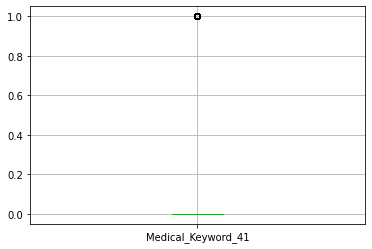

count    59381.000000
mean         0.010054
std          0.099764
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_41, dtype: float64
Skewness:  9.822458539501673


Column:  Medical_Keyword_42


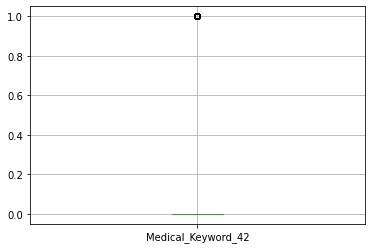

count    59381.000000
mean         0.045536
std          0.208479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_42, dtype: float64
Skewness:  4.35994246504929


Column:  Medical_Keyword_43


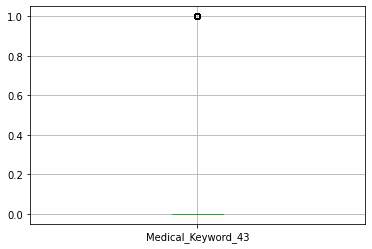

count    59381.000000
mean         0.010710
std          0.102937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_43, dtype: float64
Skewness:  9.506931409455676


Column:  Medical_Keyword_44


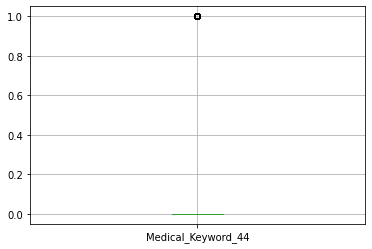

count    59381.000000
mean         0.007528
std          0.086436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_44, dtype: float64
Skewness:  11.395505505541607


Column:  Medical_Keyword_45


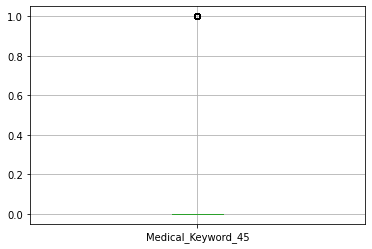

count    59381.000000
mean         0.013691
std          0.116207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_45, dtype: float64
Skewness:  8.36999289291722


Column:  Medical_Keyword_46


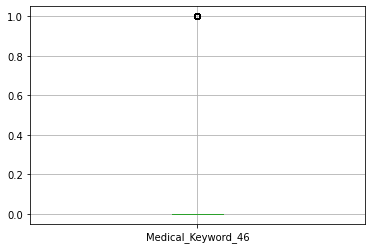

count    59381.000000
mean         0.008488
std          0.091737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_46, dtype: float64
Skewness:  10.716053666043818


Column:  Medical_Keyword_47


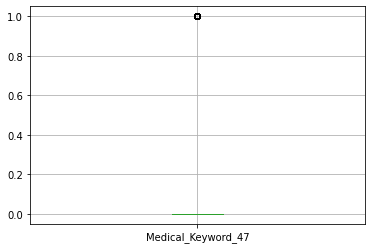

count    59381.000000
mean         0.019905
std          0.139676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_47, dtype: float64
Skewness:  6.874622165948636


Column:  Medical_Keyword_48


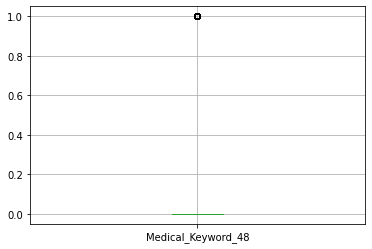

count    59381.000000
mean         0.054496
std          0.226995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_48, dtype: float64
Skewness:  3.9253711340486674


Column:  Response


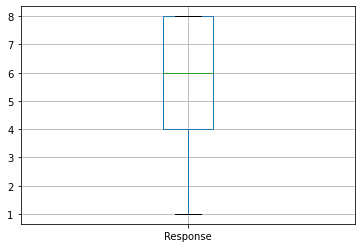

count    59381.000000
mean         5.636837
std          2.456833
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64
Skewness:  -0.7746691513144923




In [96]:
for column in columns:
    dataset.boxplot(column=column)
    print('Column: ', column)
    plt.show()
    print(dataset[column].describe())
    print('Skewness: ', dataset[column].skew())
    print('\n')

-------------------------------------------
Column:  Product_Info_6


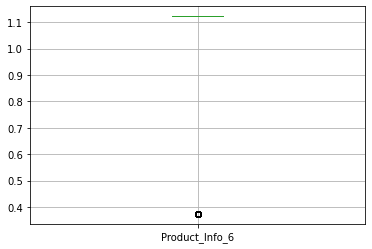

count    59381.000000
mean         1.000000
std          0.276445
min          0.374028
25%          1.122083
50%          1.122083
75%          1.122083
max          1.122083
Name: Product_Info_6, dtype: float64
Skewness:  -1.8228096094843764


Column:  Employment_Info_2


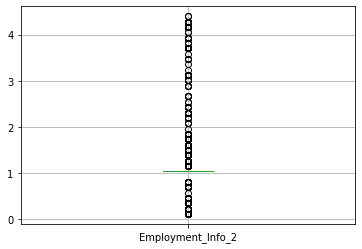

count    59381.000000
mean         1.000000
std          0.489142
min          0.115716
25%          1.041447
50%          1.041447
75%          1.041447
max          4.397221
Name: Employment_Info_2, dtype: float64
Skewness:  0.5634913999800417


Column:  InsuredInfo_3


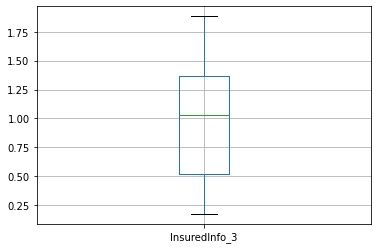

count    59381.000000
mean         1.000000
std          0.458295
min          0.171355
25%          0.514065
50%          1.028130
75%          1.370840
max          1.884904
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10829206979812922


Column:  Insurance_History_3


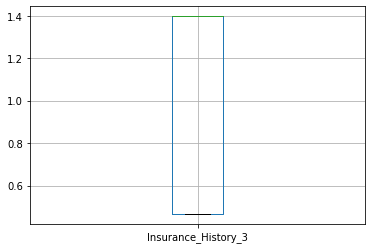

count    59381.000000
mean         1.000000
std          0.460711
min          0.465770
25%          0.465770
50%          1.397310
75%          1.397310
max          1.397310
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2972014102879719


Column:  Insurance_History_8


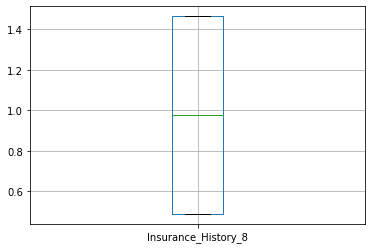

count    59381.000000
mean         1.000000
std          0.368638
min          0.488166
25%          0.488166
50%          0.976332
75%          1.464498
max          1.464498
Name: Insurance_History_8, dtype: float64
Skewness:  -0.080288087061241


Column:  Insurance_History_9


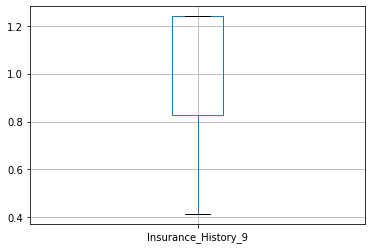

count    59381.000000
mean         1.000000
std          0.210625
min          0.413332
25%          0.826665
50%          0.826665
75%          1.239997
max          1.239997
Name: Insurance_History_9, dtype: float64
Skewness:  0.14308556984823687


Column:  Family_Hist_1


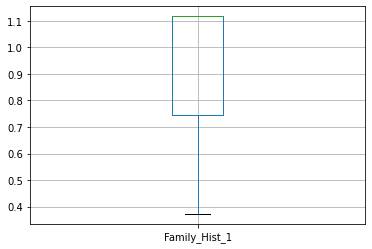

count    59381.000000
mean         1.000000
std          0.179865
min          0.372269
25%          0.744538
50%          1.116807
75%          1.116807
max          1.116807
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0418239409439591


Column:  Medical_History_1


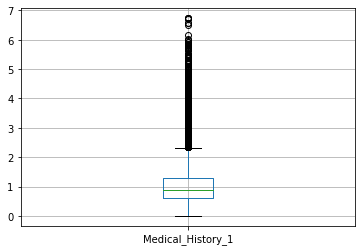

count    50492.000000
mean         1.000000
std          0.708285
min          0.000000
25%          0.614164
50%          0.868560
75%          1.302840
max          6.727834
Name: Medical_History_1, dtype: float64
Skewness:  1.5754578600683729


Column:  Medical_History_2


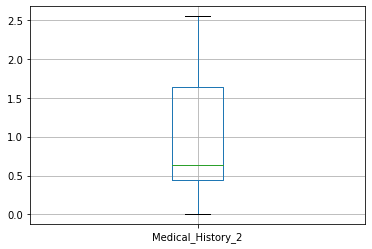

count    59381.000000
mean         1.000000
std          0.703269
min          0.003937
25%          0.440967
50%          0.637828
75%          1.645753
max          2.551311
Name: Medical_History_2, dtype: float64
Skewness:  0.593985910692653


Column:  Medical_History_8


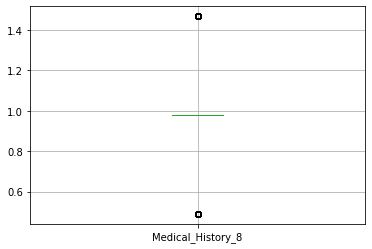

count    59381.000000
mean         1.000000
std          0.142535
min          0.489216
25%          0.978431
50%          0.978431
75%          0.978431
max          1.467647
Name: Medical_History_8, dtype: float64
Skewness:  1.3252768886036903


Column:  Medical_History_10


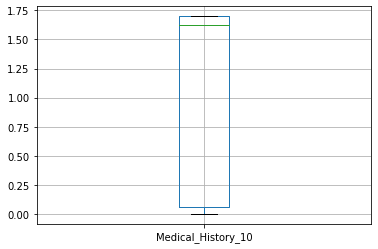

count    558.000000
mean       1.000000
std        0.762544
min        0.000000
25%        0.056619
50%        1.620715
75%        1.698566
max        1.698566
Name: Medical_History_10, dtype: float64
Skewness:  -0.3131017888417285


Column:  Medical_History_15


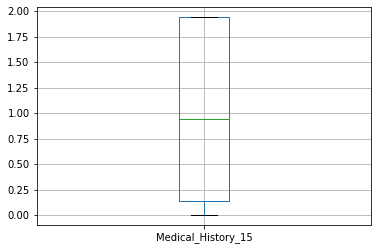

count    14785.000000
mean         1.000000
std          0.796020
min          0.000000
25%          0.137362
50%          0.945371
75%          1.939222
max          1.939222
Name: Medical_History_15, dtype: float64
Skewness:  0.01707845706001011


Column:  Medical_History_23


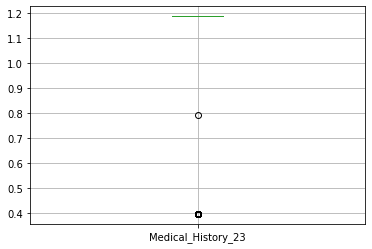

count    59381.000000
mean         1.000000
std          0.335891
min          0.395552
25%          1.186655
50%          1.186655
75%          1.186655
max          1.186655
Name: Medical_History_23, dtype: float64
Skewness:  -1.2438655069271316


Column:  Medical_History_24


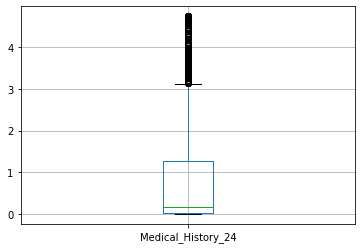

count    3802.000000
mean        1.000000
std         1.543650
min         0.000000
25%         0.019754
50%         0.158033
75%         1.264265
max         4.740993
Name: Medical_History_24, dtype: float64
Skewness:  1.5578079412891943


Column:  Medical_History_26


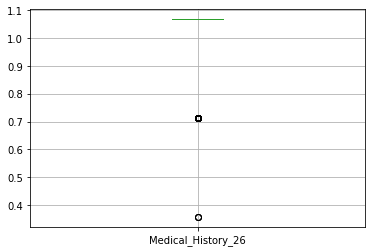

count    59381.000000
mean         1.000000
std          0.139993
min          0.356001
25%          1.068004
50%          1.068004
75%          1.068004
max          1.068004
Name: Medical_History_26, dtype: float64
Skewness:  -1.5745245542775173


Column:  Medical_History_29


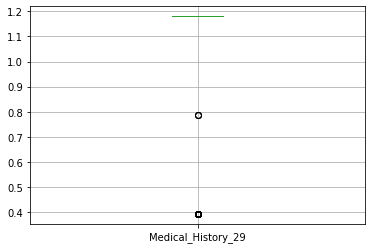

count    59381.000000
mean         1.000000
std          0.330320
min          0.393283
25%          1.179849
50%          1.179849
75%          1.179849
max          1.179849
Name: Medical_History_29, dtype: float64
Skewness:  -1.292284497158141


Column:  Medical_History_34


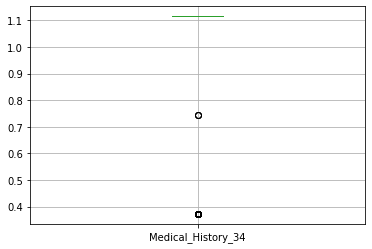

count    59381.000000
mean         1.000000
std          0.269483
min          0.371875
25%          1.115625
50%          1.115625
75%          1.115625
max          1.115625
Name: Medical_History_34, dtype: float64
Skewness:  -1.9017609545069998


Column:  Medical_History_36


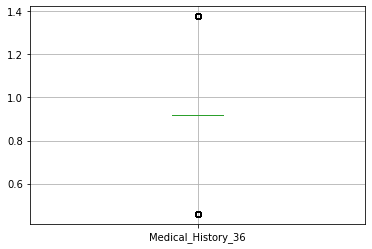

count    59381.000000
mean         1.000000
std          0.189328
min          0.458828
25%          0.917655
50%          0.917655
75%          0.917655
max          1.376483
Name: Medical_History_36, dtype: float64
Skewness:  1.1674384099363646


Column:  Response


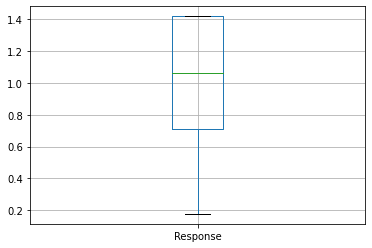

count    59381.000000
mean         1.000000
std          0.435853
min          0.177404
25%          0.709618
50%          1.064427
75%          1.419236
max          1.419236
Name: Response, dtype: float64
Skewness:  -0.7746691513144913




In [98]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].mean() > 2:
        dataset[column] = dataset[column]/dataset[column].mean()
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

# mean transformation to reduce variance

In [ ]:
sns.pairplot(dataset, vars = columns)

In [ ]:
# Doing count plots for categorical
for col in columns:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(30, 10))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='orange')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    plt.show()